The documents to be explored are from fictions of three authors.
- AChristmasCarol_Dickens.txt
- ATaleofTwoCities_Dickens.txt
- GreatExpectations_Dickens.txt


- Emma_Austen.txt
- Persuasion_Austen.txt
- PrideandPrejudice_Austen.txt


- HenryV_Shakespeare.txt
- Macbeth_Shakespeare.txt
- Richard3_Shakespeare.txt

- We will first take a look at the length of each text.
- Next, we will measure and visualize the distance of the texts.
- Last, we will generate a dendrogram to show the authorship grouping.

In [105]:
import os
import numpy as np
import sklearn.feature_extraction.text as text

data_dir = 'Fictions/'

filenames = np.array(sorted(os.listdir(data_dir)))

filenames_with_path = [os.path.join(data_dir, fn) for fn in filenames] # join the path with filenames

In [106]:
filenames_with_path

['Fictions/AChristmasCarol_Dickens.txt',
 'Fictions/ATaleofTwoCities_Dickens.txt',
 'Fictions/Emma_Austen.txt',
 'Fictions/GreatExpectations_Dickens.txt',
 'Fictions/HenryV_Shakespeare.txt',
 'Fictions/Macbeth_Shakespeare.txt',
 'Fictions/Persuasion_Austen.txt',
 'Fictions/PrideandPrejudice_Austen.txt',
 'Fictions/Richard3_Shakespeare.txt']

In [107]:
vectorizer = text.CountVectorizer(input='filename')

In [108]:
dtm = vectorizer.fit_transform(filenames_with_path)


In [109]:
vocab = np.array(vectorizer.get_feature_names())

In [110]:
# sum over rows to calculate lengths(the numbers in a row are word frequency of a document,so sum the numbers to get the word count of each document)
lengths = np.sum(dtm, axis=1)
print lengths



[[ 31549]
 [135479]
 [157653]
 [179083]
 [ 28605]
 [ 19700]
 [ 83924]
 [121170]
 [ 33849]]


In [111]:

# plot histogragh
import matplotlib.pyplot as plt


plt.hist(lengths,edgecolor='black',facecolor='blue')



(array([ 4.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.]),
 array([  19700. ,   35638.3,   51576.6,   67514.9,   83453.2,   99391.5,
         115329.8,  131268.1,  147206.4,  163144.7,  179083. ]),
 <a list of 10 Patch objects>)

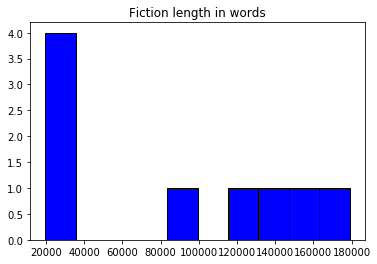

In [112]:
plt.title("Fiction length in words")
plt.show()

In [113]:
# find the longest and the shortest texts

(np.max(lengths), filenames[np.argmax(lengths)])

(179083, 'GreatExpectations_Dickens.txt')

In [114]:
(np.min(lengths), filenames[np.argmin(lengths)])

(19700, 'Macbeth_Shakespeare.txt')

### Measure of distance

#### Multidimensional scaling

Multidimensional scaling (MDS) seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space.

In [115]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity

In [116]:
dist = 1 - cosine_similarity(dtm)

In [117]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)


In [118]:
# create very short names for plotting
# filenames have form: AChristmasCarol_Dickens.txt

authors = [] 
names = []

In [119]:
for fn in filenames:
    author = fn.split('_')[1]
    authors.append(author)
    names.append(fn)

In [120]:
plt.figure(figsize=(11, 7)) 

In [121]:
xs, ys = pos[:, 0], pos[:, 1]
authors_unique = sorted(set(authors)) # get unique authors
print authors_unique

['Austen.txt', 'Dickens.txt', 'Shakespeare.txt']


In [122]:
colors = [authors_unique.index(a) for a in authors] # get a unique color for texts of each author  

plt.scatter(xs, ys,c=colors,cmap='viridis')


In [123]:
for x, y, name in zip(xs, ys, names):
    plt.text(x, y, name, alpha=0.5, fontsize=10)

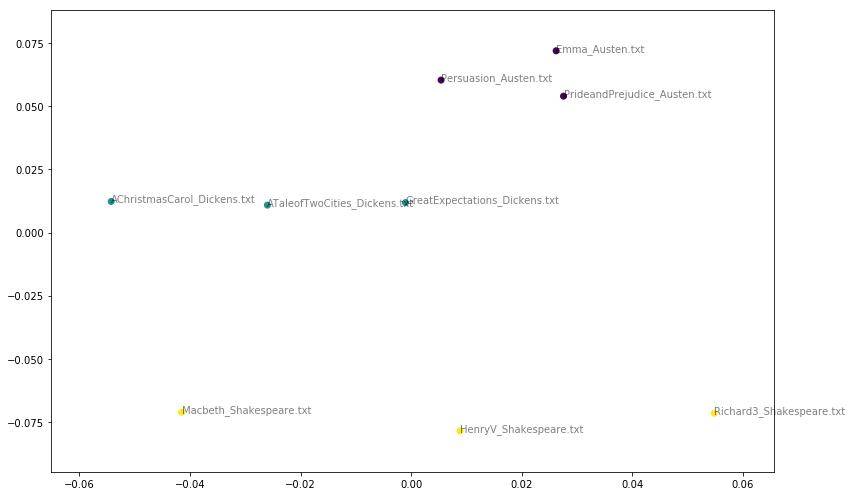

In [124]:
# tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
# tight_layout: https://matplotlib.org/users/tight_layout_guide.html
plt.tight_layout()
plt.show()

### Dendrogram
A dendrogram is a tree diagram frequently used to illustrate the arrangement of the clusters produced by hierarchical clustering. Here, we will use dendrogram to show the authorship cluster.


In [141]:
# Performs Ward’s linkage on a condensed or redundant distance matrix.
from scipy.cluster.hierarchy import ward, dendrogram
linkage_matrix = ward(dist)

In [142]:
plt.figure(figsize=(8, 6)) 

In [143]:
dendrogram(linkage_matrix, orientation="right", labels=names, leaf_font_size=10);

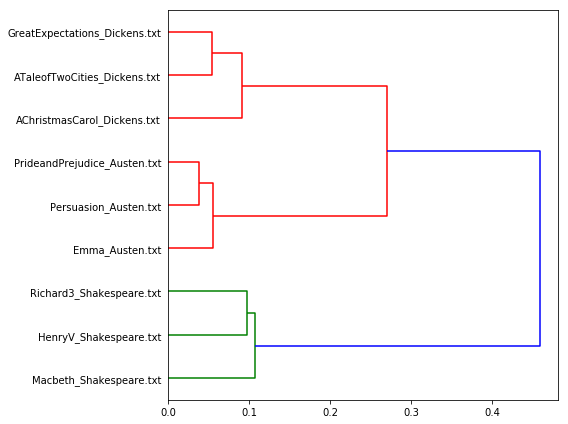

In [144]:
plt.tight_layout()
plt.show()

- Charles John Huffam Dickens (1812-1870)
- Jane Austen (1775-1817)
- William Shakespeare (1564-1616)


Reference: 

https://de.dariah.eu/tatom/case_study_racine.html

https://en.wikipedia.org/wiki/Dendrogram

http://scikit-learn.org/stable/modules/manifold.html#multidimensional-scaling